In [19]:
import pandas as pd

df = pd.read_csv("HR_comma_sep.csv")

# show first rows
df.head()

# mean of numeric features grouped by retention
df.groupby('left').mean(numeric_only=True)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
left,,,,,,,
0,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251
1,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321


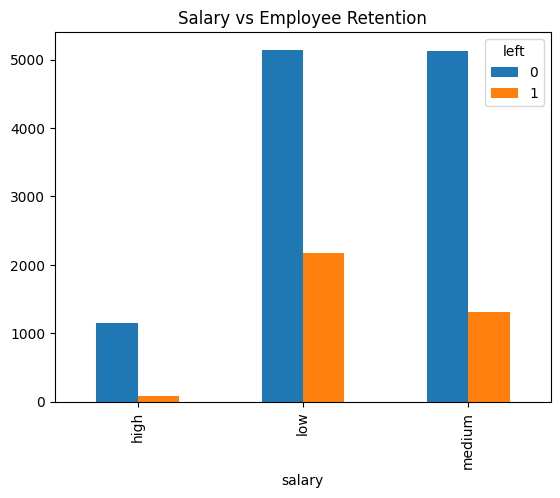

In [20]:
pd.crosstab(df.salary, df.left).plot(kind='bar')
plt.title("Salary vs Employee Retention")
plt.show()

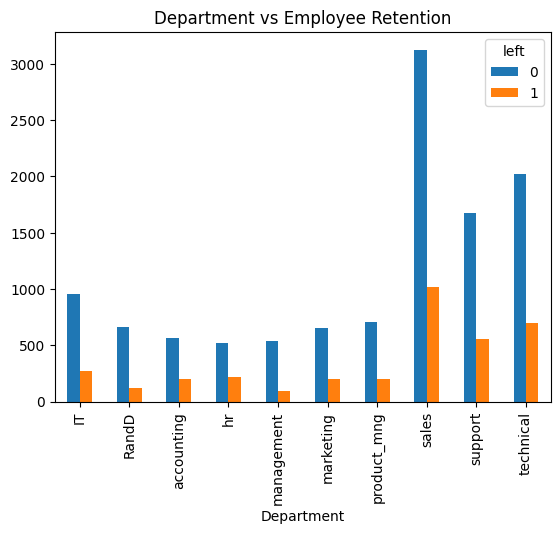

In [21]:
pd.crosstab(df.Department, df.left).plot(kind='bar')
plt.title("Department vs Employee Retention")
plt.show()

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Select important features
X = df[['satisfaction_level','average_montly_hours','promotion_last_5years','salary']]
X = pd.get_dummies(X, drop_first=True)

y = df['left']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.762


In [23]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

zoo = pd.read_csv("zoo-data.csv")

# Drop animal name column
zoo = zoo.drop('animal_name', axis=1)

X = zoo.drop('class_type', axis=1)
y = zoo['class_type']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.9523809523809523


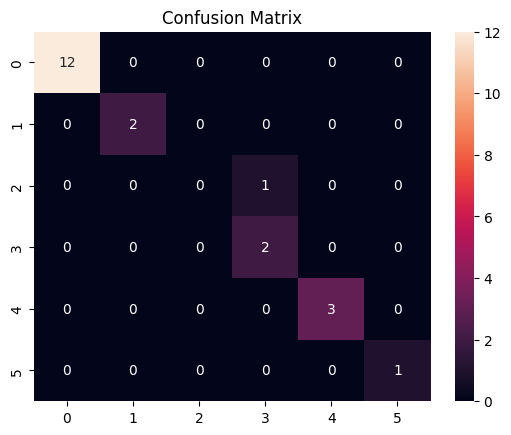

In [24]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.show()